FileNotFoundError: [Errno 2] No such file or directory: '../../reports/figures/gibbs_cluster/hla0201_9mers_pos_10_cluster_group.png'

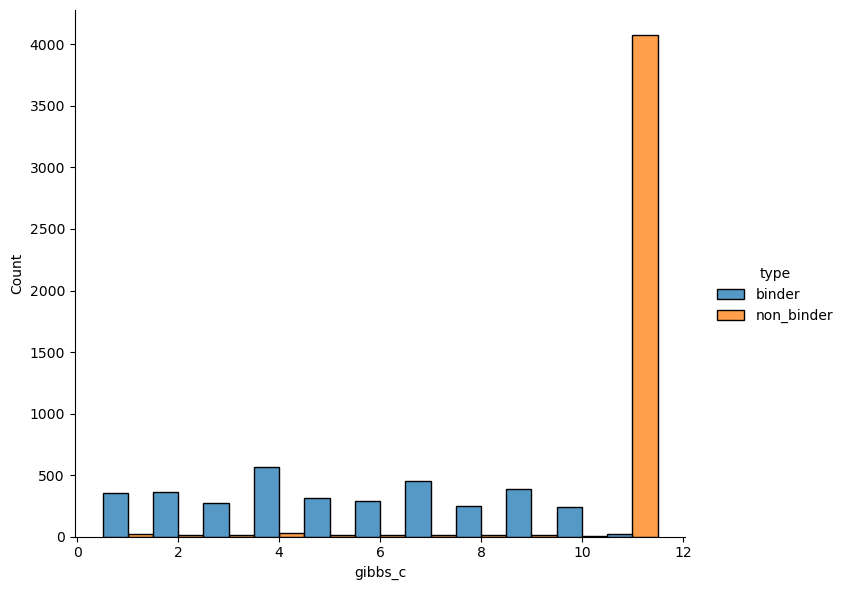

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PANDORA import Database

ds = "hla0201_9mers_pos"
cluster_path =f"/home/daqop/Desktop/3D-vac-project/GibbsCluster/ServerOutput/{ds}/cores" 
csv_path = "../../data/external/processed/hla0201_9mers.csv"

#read the db1:
df = pd.read_csv(csv_path)

#load the PANDORA database to retrieve names of peptides with cristal structure available:
db = Database.load()

cluster_group =10 
df["gibbs_c"] = cluster_group+1
clusters = []

# add a column `type` containing binding or not:
df.loc[df["measurement_value"] < 500.0,"type"] = "binder"
df.loc[df["measurement_value"] >= 500.0, "type"] = "non_binder"

# add a column `cristal` containing either cristal or not:
cristal_peptides = [db.MHCI_data[template].peptide for template in db.MHCI_data.keys()]
cristals = [p in cristal_peptides for p in df["peptide"]]
df["cristal"] = cristals

# iterate through all core files containing peptides:
for i in range(1, cluster_group+1):
    clusters.append(i)
    with open(f"{cluster_path}/gibbs.{i}of{cluster_group}.core") as f:
        peptides = [l.replace("\n", "") for l in f]
        for p in peptides:
            # for each peptides in the core file, update the gibbs_cluster in the df:
            df.loc[df["peptide"] == p, "gibbs_c"] = i
        # print(f"For cluster {i}:\n Number of binders: {pos} \n Number of negatives: {neg}")

#plot:
sns.displot(data=df, x="gibbs_c", hue="type", multiple="dodge", discrete=True, height=6, aspect=1.2)
plt.title(f"")
plt.savefig(f"../../reports/figures/gibbs_cluster/{ds}_{cluster_group}_cluster_group.png")

# sns.displot(data=df, x="gibbs_c", hue="cristal", multiple="dodge", discrete=True, height=6, aspect=1.2)

# some notes:
# 8 and 4 clusters are interesting for their distribution
